# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw
import random

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate, $\gamma$ at which people enter the recovered state? If you understood the above you can explain this to yourself.
Gamma is some constant that describe how fast people recover

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

**Answer 11.1.1**:
> To evaluate the SIS model, we only need two rate equations, because there only are two compartments. You can be susceptible or infected. The two rate equations are listed below and they each tell us how fast the population in the corresponding compartment is changing:
$$\frac{dS}{dt} = \gamma I -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$
> The first equation describes the change in the susceptible compartment at a given point in time. There are people leaving the susceptible compartment and entering the infected compartment and vice versa. 
>
> The second equation describes the change in the infected compartment at a given point in time. $\gamma I$ cover how many people who "recover" from e.g. the Flu and enter the susceptible compartment agian and the term $\beta SI$ describe have many people who enter the infected compartment. 
> 
>
> $\beta$ describe how rapidly the disease is spread. I.e. it describe the probability that the infected compartment infecte the susceptible compartment. 
> $\gamma $ describe how quick people recover from the diseases. 
> If $\beta$ is high and $\gamma$ is low, then the SIS-model describe a "pandami".

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

> **Ans. 11.1.3**: 
> 1. To only get around 10 infected individuals (Nodes beeing linked) we need in the following strategies the following percentage of the population to have the vaccinate: **strategy A = above 82 pct.**  **startegy B = 33,45 pct (1/3)** and **strategy C = above 80 pct.**
> 2. Strategy C works better than strategy C due to the **friendship paradox**, which generally speaking says that most people have fewer friends than their friends have, on average. This mean that the random person choosen on average would tend to infected less people, than the random persons neighboor.   
> 3. The BA network has a much stronger variation in node degree compared to the ER network. Therefore the effects explained above should be stronger in the BA network.

> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.
>
> **Ans. 11.1.4**:
>
>2: 
> The phenomenon which is communicated is a Epidemonic-case. The compartmental model used in this case is the SIRS model, which is a model, where nodes are susceptible at start, then get infected and stay infected for some time. After some time they gain resistance so that they can niether become infected nor spread disease further. But after a while they get susceptible again, maybe because the resistance fade or because the disease mutate. This cycle continues. The SIRS model, models things like the flu which comes and goes or it could be the current virus, COVID-19. 
E.g. the State Serum Institute tries every year to come up with a vaccine to the upcoming flu-season, based on last years flu and the current flu-structure which might be taking place on the Southern Hemisphere (Australia).  
Based on how we adjust the *corresponding rates* is the model able to fit different scenarios. E.g. if the *recovery rate* is relatively high it might describe a situation with flu rather than a situation with COVID-19. 
 


> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [2]:
G = nx.connected_caveman_graph(10, 5)
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network


In [3]:
import numpy as np
p_I = 0.1 # sets a parameter which indicate the probability to become infected
n_iter = 200 # The number of iterations, i.e. the number of times each node are able to get in touch with their neighbours. 

I = set() # define the infected compartment
S = set(G.nodes()) # define the susceptible compartment, which is all the nodes in G initially. 

patient0 = np.random.choice(list(S)) # Pick a random patient zero

I.add(patient0) # add patient zero to the infected compartment
S.remove(patient0) # remove patient zero from the susceptible compartment.

for t in range(n_iter): # Let the nodes get in touch with their neighbours a fixed number of times.  
    for infected_node in list(I): # Introduce the transmission
        neighbors = G.neighbors(infected_node) #Boolean expression; Check for each nodes if their neighbours are infected, and creat a list for the neighbours to an infected. 
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) # If so, that the nodes neighbour is infected, then is the probability that the nodes itself gets infected 10 pct. The list containes the new infected nodes. 
        I |= infected_neighbors # Add the infected neighbors
        S -= infected_neighbors # Remove the infected neighbors. 

In [4]:
def SI(network = G, p_I = 0.1, n_iter = 200):

    '''
    network: network input
    p_I: the probability to become infected
    n_iter: The number of iterations
    random: random seed number, by default 20
    '''

    
    I = set() 
    S = set(network.nodes())
    I_frac = []
    Time = []

    patient0 = np.random.choice(list(S)) 
    I.add(patient0) 
    S.remove(patient0) 

    for t in range(n_iter):  
        for infected_node in list(I):
            neighbors = network.neighbors(infected_node) 
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) 
            I |= infected_neighbors 
            S -= infected_neighbors
        
        
        I_frac.append( len(I) / len(network.nodes()) )
        Time.append(t)
    
    fig, ax = plt.subplots()
    plt.bar(Time, I_frac, width=0.80, color='b')

    plt.title("SI-model")
    plt.ylabel("the fraction of infected")
    plt.xlabel("Time")
    plt.show()

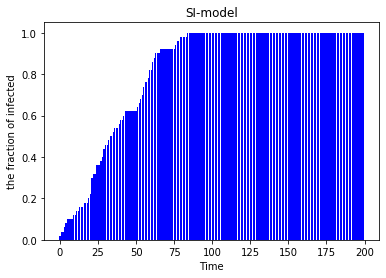

In [5]:
SI()

In [6]:
def SIS(network = G, p_I = 0.1, T_I = 10, n_iter = 200):

    '''
    network: network input
    p_I: the probability to become infected
    n_iter: The number of iterations
    random: random seed number, by default 20
    T_I: Periode of time a node is infected
    '''

    days_being_infected_dict = dict(zip(list(network.nodes()),np.zeros(len(network.nodes() )) ))
    
    I = set() 
    S = set(network.nodes())
    I_frac = []
    Time = []

    patient0 = np.random.choice(list(S)) 
    I.add(patient0) 
    S.remove(patient0) 
    
    days_being_infected_dict[patient0] += 1
    
    for t in range(n_iter):  
        for infected_node in list(I):
            neighbors = network.neighbors(infected_node) 
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) 
            I |= infected_neighbors 
            S -= infected_neighbors
            
            if days_being_infected_dict[infected_node] < T_I:
                days_being_infected_dict[infected_node] +=1
            else:
                days_being_infected_dict[infected_node] = 0
                
                I.remove(infected_node)
                S.add(infected_node)
                
            
        
        I_frac.append( len(I) / len(network.nodes()) )
        Time.append(t)
    
    fig, ax = plt.subplots()
    plt.bar(Time, I_frac, width=0.80, color='b')

    plt.title("SIS-model")
    plt.ylabel("the fraction of infected")
    plt.xlabel("Time")
    plt.show()

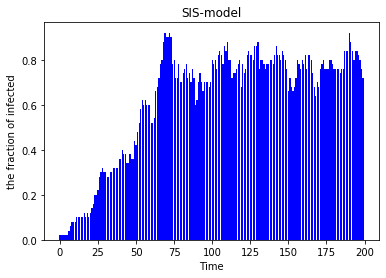

In [7]:
SIS(T_I=10)

Comment: When the SIS-model is implemented, a maximum of around 85% of the population is infected. It makes sense that not the entire population is infected at any point in time, as our pool of infected nodes reenter the pool of susceptiple.

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [27]:
data =  pd.read_csv(
    "facebook-wall.txt.ANON",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

def data_inbetweentimes(t0, t1):
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph) 
    return G_t

# Get times for the last 365 days
t0 = data.timestamp.max() - 86400 * 365
t1 = data.timestamp.max()

G_data =  data_inbetweentimes(t0, t1)
# We remove all nodes that have a degree lower than 21 and we remove additional edges if their weight is less or equal to 1.

remove = {node:v for node,v in G_data.degree() if v < 21}
G_data.remove_nodes_from(remove)

# Remove additional edges
esmall = [(u, v) for (u, v, d) in G_data.edges(data=True) if d['weight'] <= 1]
G_data.remove_edges_from(esmall)
print('New number of nodes:',G_data.number_of_nodes())
print('New number of edges:',G_data.number_of_edges())

New number of nodes: 4977
New number of edges: 23835


In [28]:
def SIRS(network = G, p_I = 0.1, T_I = 20, R_I= 2, n_iter = 200):

    '''
    network: network input
    p_I: the probability to become infected
    n_iter: The number of iterations
    random: random seed number, by default 20
    T_I: Periode of time a node is infected
    R_I: Period of time a node is resistant
    '''

    days_being_infected_dict = dict(zip(list(network.nodes()),np.zeros(len(network.nodes() )) ))
    days_being_resistant_dict = dict(zip(list(network.nodes()),np.zeros(len(network.nodes() )) ))
    
    I = set() 
    S = set(network.nodes())
    
    R = set() # Resistant nodes
    
    I_frac = []
    S_frac = []
    R_frac = []
    Time = []

    patient0 = np.random.choice(list(S)) 
    I.add(patient0) 
    S.remove(patient0) 
    
    days_being_infected_dict[patient0] += 1
    
    for t in range(n_iter):  
        for infected_node in list(I):
            neighbors = network.neighbors(infected_node)
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I and n not in R]) 
            I |= infected_neighbors 
            S -= infected_neighbors
            
            if days_being_infected_dict[infected_node] < T_I:
                days_being_infected_dict[infected_node] +=1
            else:
                days_being_infected_dict[infected_node] = 0
                
                I.remove(infected_node)
                R.add(infected_node)
                
                
        for resistant_node in list(R):
            if days_being_resistant_dict[resistant_node] < R_I:
                days_being_resistant_dict[resistant_node] += 1
            
            else:
                days_being_resistant_dict[resistant_node] = 0
                
                R.remove(resistant_node)
                S.add(resistant_node)
            
                
            
        
        I_frac.append( len(I) / len(network.nodes()) )
        S_frac.append( len(S) / len(network.nodes()) )
        R_frac.append( len(R) / len(network.nodes()) )
        Time.append(t)
    
    fig, ax = plt.subplots()
    ax.plot(Time, S_frac,  color='b', label='S')
    ax.plot(Time, I_frac,  color='r', label='I')
    ax.plot(Time, R_frac,  color='g', label='R')
    ax.legend()

    plt.title("SIRS-model")
    plt.ylabel("Fractions")
    plt.xlabel("Time")
    plt.show()


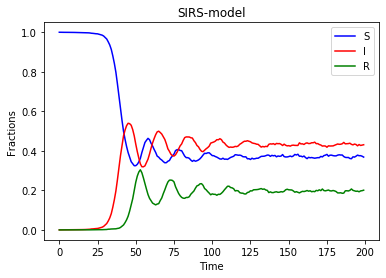

In [36]:
SIRS(network = G_data,  p_I = 0.1, T_I = 10, R_I = 5)

#Note: For some random numbers we dont obtain any infection at all. If the patient 1, do not get to infect anyone in the first 10 periods. 

The results are as expected, infectionrate quickly increases but flattens out when people start to gain temporarily immunity. 

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.